In [1]:
## importando as libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## base de dados

dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
## dimensão

dados.shape

(1034, 9)

In [4]:
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [6]:
## verificando nulos

dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

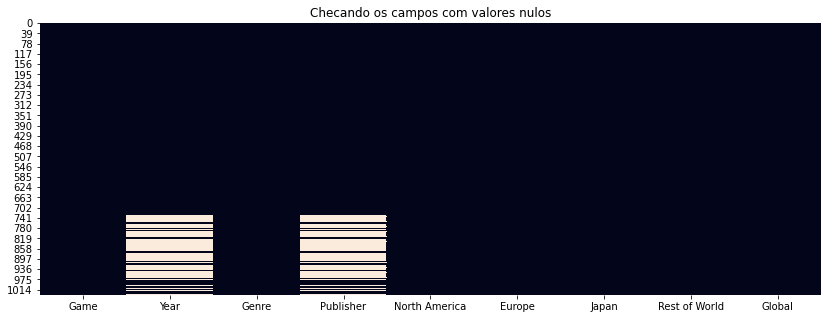

In [7]:
## checando graficamente os nulos

plt.figure(figsize=(14,5))
plt.title('Checando os campos com valores nulos')
sns.heatmap(dados.isnull(), cbar=False);

In [8]:
## retirando os nulos

dados.dropna(inplace=True)

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [9]:
dados.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

Text(0, 0.5, 'Quantidade Vendas (mi)')

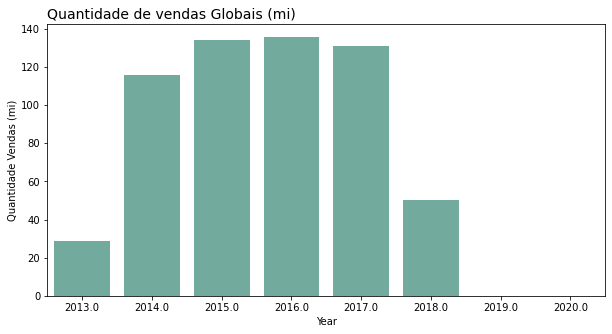

In [10]:
## gráfico

plt.figure(figsize=(10,5))
plt.title('Quantidade de vendas Globais (mi)', loc='left', fontsize=14)
sns.barplot(data=dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum);
plt.ylabel('Quantidade Vendas (mi)')

In [11]:
## retirando anos vazio

dados = dados.loc[(dados['Year'] !=2019) & (dados['Year'] !=2020)]

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


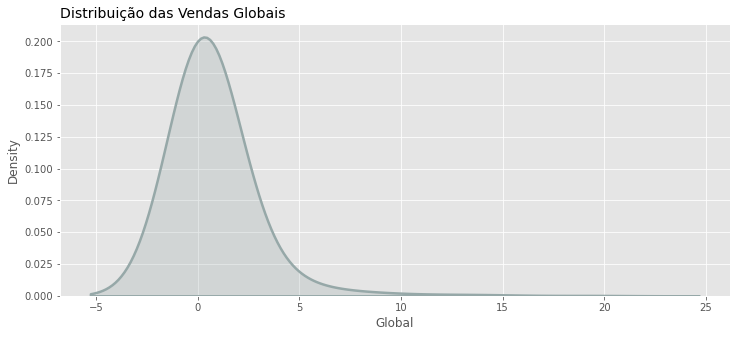

In [12]:
## tamanho da imagem

plt.figure(figsize=(12,5))

## estilo

plt.style.use('ggplot')
sns.kdeplot(dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

## titulo

plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14);

In [13]:
dados.groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


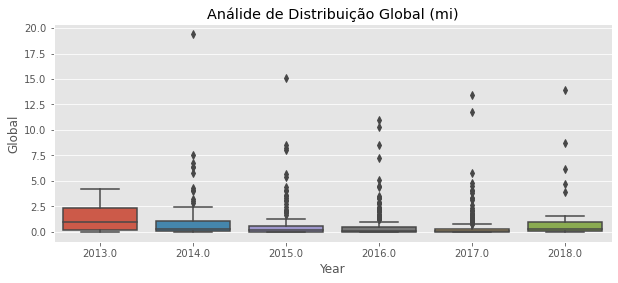

In [14]:
## tamanho e gráfico boxplot

plt.figure(figsize=(10,4))
plt.title('Análide de Distribuição Global (mi)')
sns.boxplot(data=dados, x='Year', y='Global');

In [15]:
dados.loc[dados['Global'] >=10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [16]:
analise = dados.loc[dados['Global'] >0]

analise.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [17]:
## Refinando a análise

refino = analise.groupby(by=['Year']).sum().reset_index()

## analisando a proporção dos 100% de cada continente comparado ao total

America = [America / Total * 100 for America, Total in zip(refino['North America'], refino['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(refino['Europe'], refino['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(refino['Japan'], refino['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(refino['Rest of World'], refino['Global'])]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

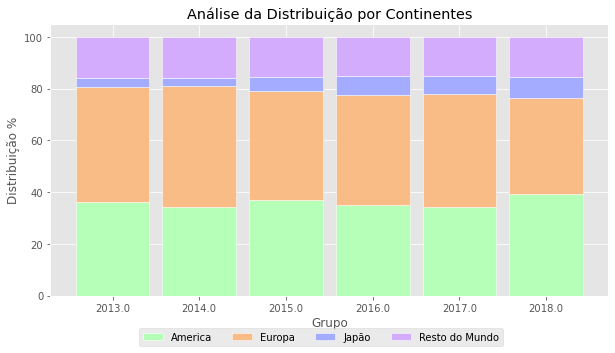

In [18]:
## grafico de barras empilhadas

plt.figure(figsize=(10,5))

## largura da barra no grafico

Largura_barra = 0.85
rotulos = refino['Year']
grupos = [0,1,2,3,4,5]

# plot da america

plt.bar(grupos, America, width=Largura_barra, color='#b5ffb9', edgecolor='white')

# plot da europa

plt.bar(grupos, Europa, bottom=America, width=Largura_barra, color='#f9bc86', edgecolor='white')

# plot do japao

plt.bar(grupos, Japao, bottom=[a + b for a, b in zip(America, Europa)], width=Largura_barra, color='#a3acff', edgecolor='white')

# plot resto do mundo

plt.bar(grupos, Mundo, bottom=[a + b + c for a, b, c in zip(America, Europa, Japao)], width=Largura_barra, color='#d3acfe', edgecolor='white')

## titulo

plt.title('Análise da Distribuição por Continentes')

## labels

plt.xticks(grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# legenda

plt.legend(['America', 'Europa', 'Japão', 'Resto do Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);

In [20]:
dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [22]:
## convertendo os dados de qualitativos em quantitativos

from sklearn.preprocessing import LabelEncoder

In [25]:
label = LabelEncoder()

dados['Produtor'] = label.fit_transform(dados['Publisher'])
dados['Genero'] = label.fit_transform(dados['Genre'])
dados['Jogo'] = label.fit_transform(dados['Game'])


dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [26]:
##  paleta de core

paleta = sns.color_palette('husl', 8)

paleta

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

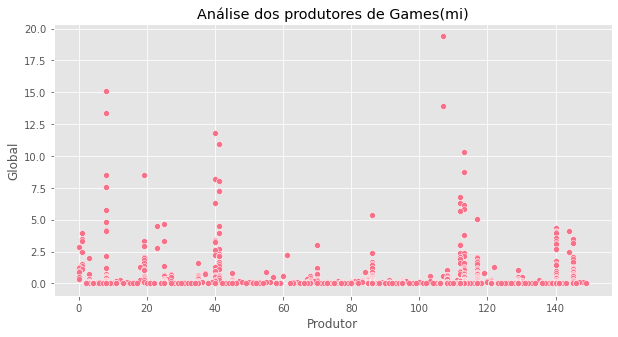

In [28]:
plt.figure(figsize=(10,5))
plt.title('Análise dos produtores de Games(mi)')
sns.scatterplot(data=dados, x='Produtor', y='Global', color=paleta[0]);

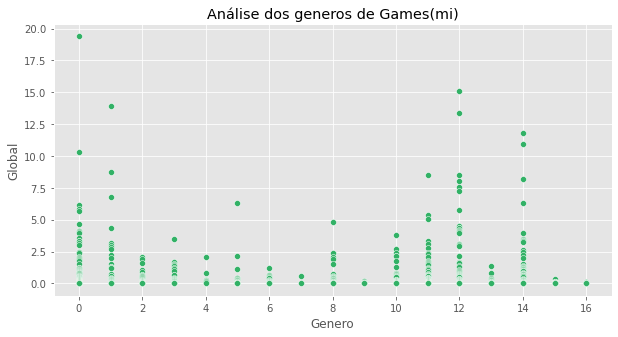

In [32]:
plt.figure(figsize=(10,5))
plt.title('Análise dos generos de Games(mi)')
sns.scatterplot(data=dados, x='Genero', y='Global', color=paleta[3]);

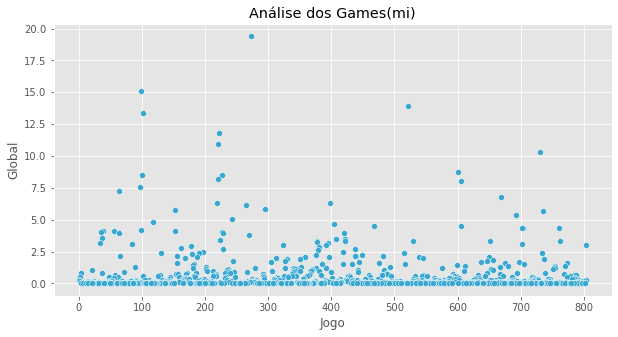

In [33]:
plt.figure(figsize=(10,5))
plt.title('Análise dos Games(mi)')
sns.scatterplot(data=dados, x='Jogo', y='Global', color=paleta[5]);